In [1]:
###
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import numpy as np
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tkinter as tk
from tkinter import filedialog, Label, Button
from PIL import Image, ImageTk
from sklearn.preprocessing import LabelEncoder

/Users/yanyanyou/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for data augmentation
data_gen = ImageDataGenerator(
    rotation_range=30,        # Randomly rotate images within ±30 degrees
    width_shift_range=0.2,    # Randomly shift the image horizontally by ±20%
    height_shift_range=0.2,   # Randomly shift the image vertically by ±20%
    shear_range=0.2,          # Apply random shear transformations
    zoom_range=0.2,           # Randomly zoom in/out by ±20%
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill empty areas using the nearest neighbor method
)

def load_and_augment_images(image_folder, target_size=(128, 128, 3), num_augmented=1000):
    """
    Load images from a dataset folder, apply preprocessing and data augmentation.

    Parameters:
    - image_folder (str): Path to the dataset folder.
    - target_size (tuple): Target image size (height, width, channels).
    - num_augmented (int): Total number of augmented images to generate.

    Returns:
    - images (numpy array): Array of processed and augmented images.
    - labels (numpy array): Array of corresponding labels.
    """
    images = []  # Store all processed images
    labels = []  # Store corresponding labels
    
    # Iterate through all category folders (each folder represents a class)
    for category in os.listdir(image_folder):
        category_path = os.path.join(image_folder, category)
        if not os.path.isdir(category_path):  # Skip if it's not a directory
            continue
        label = category  # Assign folder name as the label
        
        # Iterate through all images in the category folder
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            img = cv2.imread(img_path)  # Load image
            img = cv2.resize(img, target_size[:2])  # Resize to target size
            img = img / 255.0  # Normalize pixel values to range [0,1]
            images.append(img)  # Append original image
            labels.append(label)  # Append corresponding label
            
            # Expand dimensions to match ImageDataGenerator's expected input format
            img_expanded = np.expand_dims(img, axis=0)
            i = 0
            
            # Generate augmented images
            for batch in data_gen.flow(img_expanded, batch_size=1):
                images.append(batch[0])  # Append augmented image
                labels.append(label)  # Keep the same label
                i += 1
                
                # Limit the number of augmented images per class
                if i >= num_augmented // len(os.listdir(image_folder)):
                    break
    
    return np.array(images), np.array(labels)  # Convert lists to NumPy arrays


In [3]:
# Part 3: Load Data and Encode Labels
image_folder = "image"  # Path to the image dataset folder
X_train, y_train = load_and_augment_images(image_folder)  # Load and augment images

# Create a LabelEncoder and transform labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Convert class labels into numerical format


Prepares the dataset for training in a machine learning or deep learning model.

In [4]:
from tensorflow.keras import models, layers

# Part 4: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # First Conv layer with 32 filters of size 3x3
    layers.MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second Conv layer with 64 filters
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Conv2D(128, (3, 3), activation='relu'),  # Third Conv layer with 128 filters
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Flatten(),  # Flatten layer to convert 2D feature maps into a 1D vector
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    layers.Dense(len(set(y_train)), activation='softmax')  # Output layer with number of classes=len(set(y_train)), Softmax activation
])

# Compile the model using Adam optimizer and cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/Users/yanyanyou/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


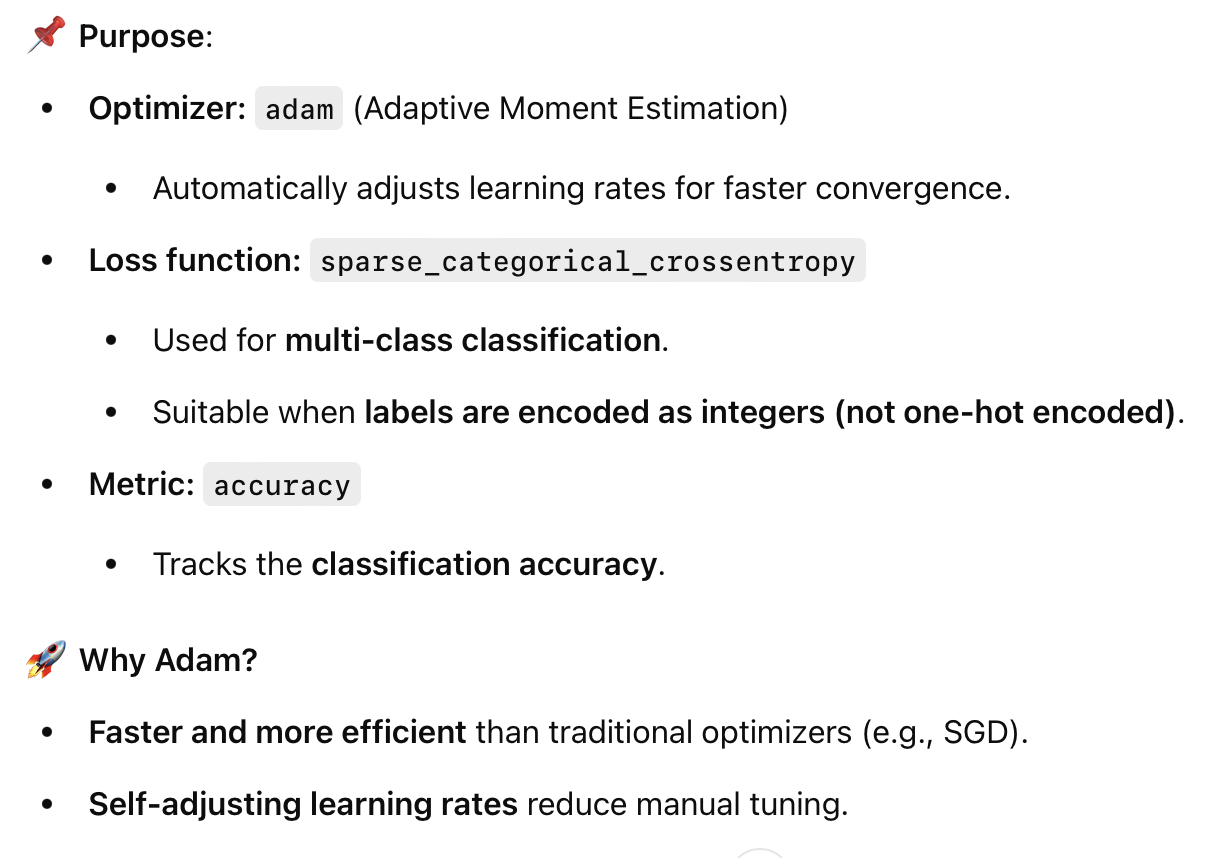

The model consists of convolutional layers, pooling layers, fully connected (dense) layers, and uses softmax activation for multi-class classification.

In [8]:
# Part 5: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)  # Train the model
model.save("rbc_cnn_model.h5")  # Save the trained model

Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 35s 260ms/step - accuracy: 0.6749 - loss: 0.6222 - val_accuracy: 0.7850 - val_loss: 0.6641
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 32s 236ms/step - accuracy: 0.9704 - loss: 0.0825 - val_accuracy: 0.9551 - val_loss: 0.1283
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 33s 250ms/step - accuracy: 0.9983 - loss: 0.0087 - val_accuracy: 0.8262 - val_loss: 0.6986
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 29s 219ms/step - accuracy: 0.9735 - loss: 0.0553 - val_accuracy: 0.8243 - val_loss: 0.6917
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 34s 251ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.8636 - val_loss: 0.6218
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 36s 271ms/step - accuracy: 1.0000 - loss: 6.8244e-04 - val_accuracy: 0.8598 - val_loss: 0.7380
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 31s 234ms/step - accuracy: 1.0000 - loss: 1.9210e-04 - val_accuracy: 0.8561 - val_loss: 0.8039
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 33s 246ms/step - accuracy: 1.0000 -

In [5]:
def detect_and_predict_cells(filepath):
    # Load image and convert to grayscale
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    
    # Apply Gaussian blur to reduce noise
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    
    # Perform binary thresholding
    _, binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)
    
    # Detect contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    results = []  # Store detected cell information
    
    for contour in contours:
        # Get bounding box coordinates (x, y, w, h)
        x, y, w, h = cv2.boundingRect(contour)
        
        # Crop the detected cell
        cell = img[y:y+h, x:x+w]
        
        # Resize to fit CNN input
        cell = cv2.resize(cell, (128, 128)) / 255.0  
        
        # Expand dimensions to match CNN input format
        cell = np.expand_dims(cell, axis=[0, -1])  
        cell = np.repeat(cell, 3, axis=-1)  # Convert grayscale to 3 channels (RGB format)

        # Predict cell type using CNN
        prediction = model.predict(cell)
        predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]  
        
        # Store prediction result
        results.append((x, y, w, h, predicted_label))
    
    # Generate text output for predictions
    result_text = "\n".join([f"Cell [{i+1}]: {label}" for i, (_, _, _, _, label) in enumerate(results)])
    result_label.config(text=result_text)  # Display results in GUI

    # Load the original image in color and annotate detected cells
    img_color = cv2.imread(filepath)
    
    for x, y, w, h, label in results:
        # Draw bounding box around the cell
        cv2.rectangle(img_color, (x, y), (x+w, y+h), (0, 255, 0), 2)
        # Label the cell with predicted class
        cv2.putText(img_color, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)
    
    # Save the annotated image
    cv2.imwrite("output.png", img_color)
    
    # Load and resize the annotated image for GUI display
    img_display = Image.open("output.png").resize((300, 300))
    img_tk = ImageTk.PhotoImage(img_display)
    
    # Update GUI to show processed image
    image_label.config(image=img_tk)
    image_label.image = img_tk


In [6]:
import tkinter as tk
from tkinter import filedialog, Label, Button

def upload_image():
    """ Open file selection dialog and process the selected image for cell detection & classification """
    filepath = filedialog.askopenfilename()  # Let user select an image
    if filepath:
        detect_and_predict_cells(filepath)  # Process the selected image

# Create Tkinter GUI window
root = tk.Tk()
root.title("Cell Recognition")  # Set window title

# GUI components
Label(root, text="Upload SEM cell image:").pack()  # Text label
Button(root, text="Select Image", command=upload_image).pack()  # Upload button
image_label = Label(root)  # Label for displaying processed image
image_label.pack()
result_label = Label(root, text="", justify="left")  # Label for displaying detected cell results
result_label.pack()

# Run the GUI event loop
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━